In [118]:
from datetime import date
import os
import pandas as pd
import scanpy as sc
import anndata as ad
import numpy as np
from src.classes import *
import matplotlib.pyplot as plt
import pickle

In [189]:
adata_path = '/media/Dropbox/MNM projects/Spatial transcriptomics project/Data analysis/Complete_ST_pipeline/data/sc_data/mouse_sc/L5_201022/'
adata_file = [adata_path + x for x in os.listdir(adata_path) if 'h5ad' in x][0]
ct_cols = ['Celltype_assigned']
adata = sc.read_h5ad(adata_file)
adata

KeyboardInterrupt: 

In [190]:
adata_path = '/media/Dropbox/MNM projects/Spatial transcriptomics project/Data analysis/Complete_ST_pipeline/data/sc_data/mouse_sc/L5_201022/'
ct_cols = ['Celltype_assigned']

In [135]:
# load scRNAseq data from tx
sc_tx_folder = '/media/Dropbox/MNM projects/Spatial transcriptomics project/Data analysis/Complete_ST_pipeline/data/sc_data/TX_filtered_annotated/'
X_path = f'{sc_tx_folder}X.csv'
genes_path = f'{sc_tx_folder}genes.csv'
bcs_path = f'{sc_tx_folder}barcodes.csv'

obs_folder = '/media/Dropbox/MNM projects/Spatial transcriptomics project/Data analysis/Complete_ST_pipeline/results/SingleR/'
obs_path = f'{obs_folder}hESC_TX_sc_SingleR_analysisL5_CTX_M_STR_CNS_description_selection_1000_astmerged_Tax4.tsv'
adata_path = obs_folder

X = pd.read_csv(X_path, header=None, index_col=None)

genes = pd.read_csv(genes_path, header=0, index_col=None)
genes.columns = ['symbol']
genes.index = genes['symbol']

bcs = pd.read_csv(bcs_path, header=0, index_col=0)

X.index = bcs.index
X.columns = genes['symbol']

obs = pd.read_csv(obs_path, header=0, index_col=0, sep='\t')
cols = obs.columns.to_list()
cols[0] = 'CellID'
obs.columns = cols
obs.index = obs['CellID']

X.index = bcs.index
X.columns = genes['symbol']

obs = obs.reindex(bcs.index)
obs['bio_celltype'] = bcs['bio_celltype']

ct_cols = ['Celltype_SingleR', 'bio_celltype']

adata = ad.AnnData(X=X, 
                  obs=obs,
                  var=genes)
adata

In [196]:
obs_folder = '/media/Dropbox/MNM projects/Spatial transcriptomics project/Data analysis/Complete_ST_pipeline/results/SingleR/'
obs_path = f'{obs_folder}hESC_TX_sc_SingleR_analysisL5_CTX_M_STR_CNS_description_selection_1000_astmerged_Tax4.tsv'
adata_path = obs_folder
ct_cols = ['Celltype_SingleR', 'bio_celltype']

In [54]:
adata.raw = adata.copy()

In [138]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [139]:
# select HVG with pearson residuals
sc.experimental.pp.highly_variable_genes(adata, flavor="pearson_residuals", n_top_genes=5000)

In [140]:
adata_hvg = adata[:, adata.var["highly_variable"]]

In [141]:
# adata_hvg.layers["raw"] = adata_hvg.X.copy()
adata_hvg.layers["sqrt_norm"] = np.sqrt(
sc.pp.normalize_total(adata_hvg, inplace=False)["X"]
)

/home/lcadmin/miniconda3/envs/ST_pipeline/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [142]:
sc.experimental.pp.normalize_pearson_residuals(adata_hvg)

In [143]:
sc.pp.pca(adata_hvg, n_comps=50)
n_cells = len(adata_hvg)

In [144]:
sc.pp.neighbors(adata_hvg, n_neighbors=10, n_pcs=50)
sc.tl.umap(adata_hvg)
sc.tl.leiden(adata_hvg)

In [191]:
markers = ['COL1A1', 'COL1A2', 'TH', 'ALDH1A1', 'AQP4', 'GFAP', 'PAX6', 'SOX2', 'SLC1A3', 'VIM']

In [146]:
adata_hvg.obs

,CellID,Celltype_SingleR,cluster,umap1,umap2,bio_celltype,n_genes,leiden
CellID,,,,,,,,
rat45-1a_AAACCTGAGTTAACGA-1,rat45-1a_AAACCTGAGTTAACGA-1,Subventricular zone radial glia-like cells,0,-0.097856,0.253083,Dentate gyrus radial glia-like cells; Actrocytes,2021,9
rat45-1a_AAACCTGCAAGCCGCT-1,rat45-1a_AAACCTGCAAGCCGCT-1,Non-glutamatergic neuroblasts,0,-2.118904,-0.615840,Dentate gyrus radial glia-like cells; Actrocytes,2388,3
rat45-1a_AAACCTGTCCAGAGGA-1,rat45-1a_AAACCTGTCCAGAGGA-1,Subventricular zone radial glia-like cells,0,1.261292,1.655929,Dentate gyrus radial glia-like cells; Actrocytes,2398,4
rat45-1a_AAACCTGTCCCAACGG-1,rat45-1a_AAACCTGTCCCAACGG-1,Subventricular zone radial glia-like cells,0,1.090436,-0.988480,Dentate gyrus radial glia-like cells; Actrocytes,3219,12
rat45-1a_AAACCTGTCTGGGCCA-1,rat45-1a_AAACCTGTCTGGGCCA-1,Subventricular zone radial glia-like cells,0,1.459451,3.866142,Dentate gyrus radial glia-like cells; Actrocytes,2970,5
...,...,...,...,...,...,...,...,...
rat45-1b_TTTGTCACAGTAAGCG-1,rat45-1b_TTTGTCACAGTAAGCG-1,Subventricular zone radial glia-like cells,0,-1.947990,0.824142,Dentate gyrus radial glia-like cells; Actrocytes,2059,6
rat45-1b_TTTGTCAGTCTACCTC-1,rat45-1b_TTTGTCAGTCTACCTC-1,Subventricular zone radial glia-like cells,0,-0.574730,-0.069834,Dentate gyrus radial glia-like cells; Actrocytes,1877,0
rat45-1b_TTTGTCAGTTGCGCAC-1,rat45-1b_TTTGTCAGTTGCGCAC-1,Subventricular zone radial glia-like cells,0,1.210748,2.583290,Dentate gyrus radial glia-like cells; Actrocytes,2398,4


In [199]:
os.chdir(adata_path)

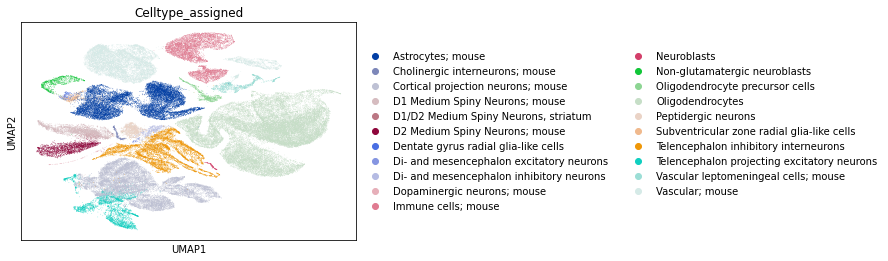

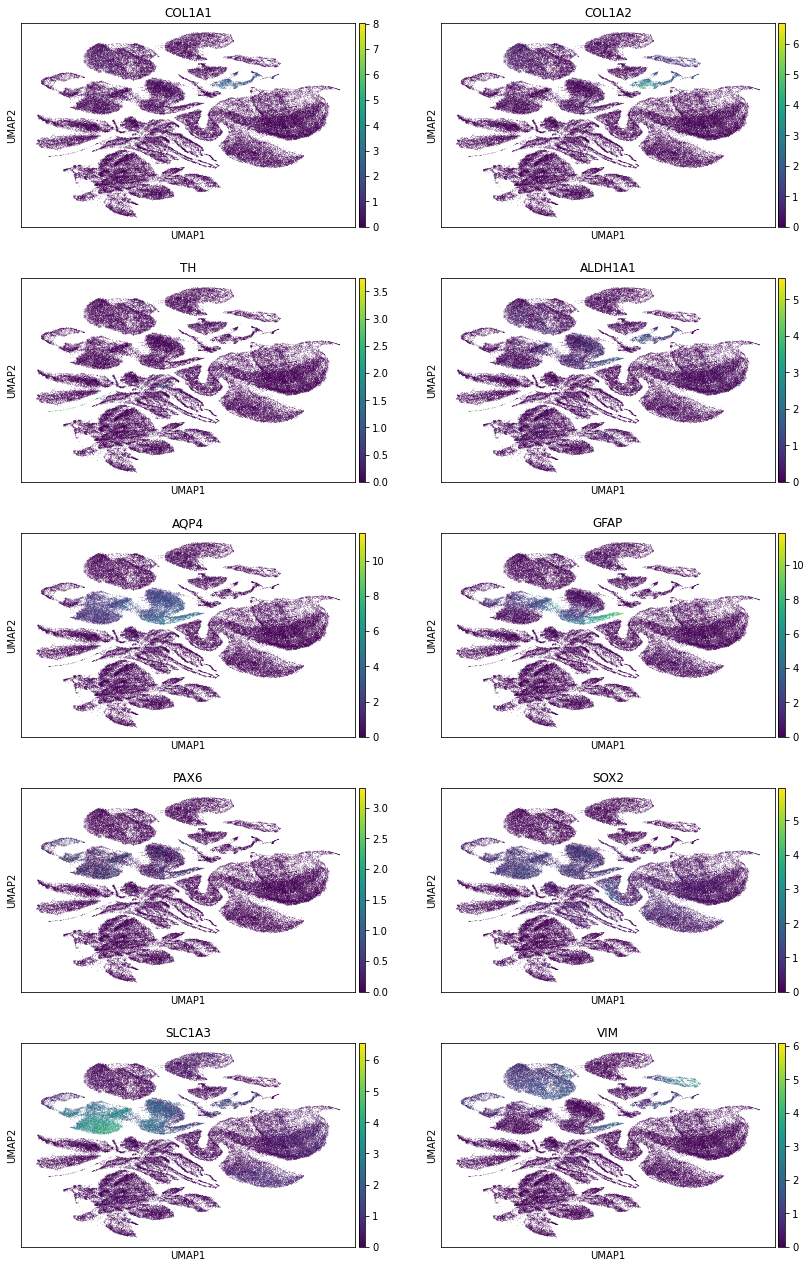

In [194]:
sc.pl.umap(adata_hvg, color=ct_cols, cmap="jet", save='_annotated.pdf', ncols=1)
sc.pl.umap(adata_hvg, color=markers, layer="sqrt_norm",  save='_genes.png', ncols=2)

# sc.pl.umap(adata_hvg, color=['Celltype_SingleR', 'bio_celltype'], cmap="jet", ncols=1)
# markers = ['COL1A1', 'TH', 'PENK', 'MBP', 'CCK', 'NORAD', 'PAX6', 'SOX2', 'SLC1A3', 'PDGFD', 'GFAP', 'VIM']
# sc.pl.umap(adata_hvg, color=markers, layer="sqrt_norm")

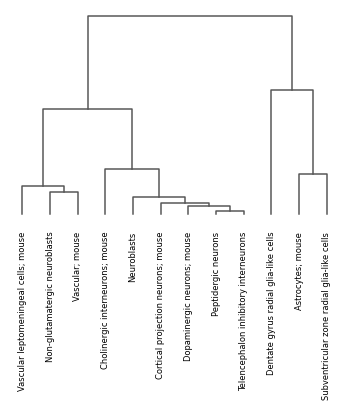

<AxesSubplot:>

In [200]:
sc.tl.dendrogram(adata_hvg, groupby=ct_cols[0])
sc.pl.dendrogram(adata_hvg, groupby=ct_cols[0], save='_' + ct_cols[0]+ '.pdf')

In [69]:
adata_hvg.write_h5ad('adata_hvg.h5ad')

In [197]:
adata_hvg = sc.read_h5ad(f'{adata_path}adata_hvg.h5ad')

In [95]:
# keep only celltypes with more than 10 cells
a_vc = adata_hvg.obs[ct_cols[0]].value_counts()
kept_ct = a_vc[a_vc > 10].index.to_list()
kept_ct

adata_hvg = adata_hvg = adata_hvg[adata_hvg.obs[ct_cols[0]].isin(kept_ct), :]

/home/lcadmin/miniconda3/envs/ST_pipeline/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


/home/lcadmin/miniconda3/envs/ST_pipeline/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


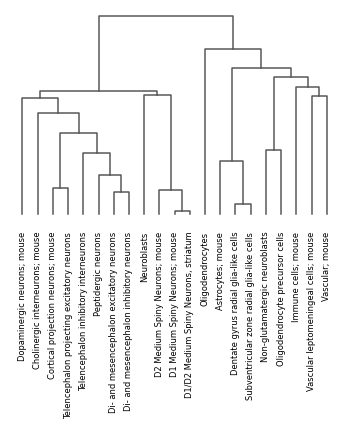

<AxesSubplot:>

In [96]:
sc.tl.dendrogram(adata_hvg, groupby='Celltype_assigned')
sc.pl.dendrogram(adata_hvg, groupby='Celltype_assigned', save='_celltype-assigned.pdf')

/home/lcadmin/miniconda3/envs/ST_pipeline/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/lcadmin/miniconda3/envs/ST_pipeline/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/lcadmin/miniconda3/envs/ST_pipeline/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/lcadmin/miniconda3/envs/ST_pipeline/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/lcadmin/miniconda3/envs/ST_pipeline/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value enco

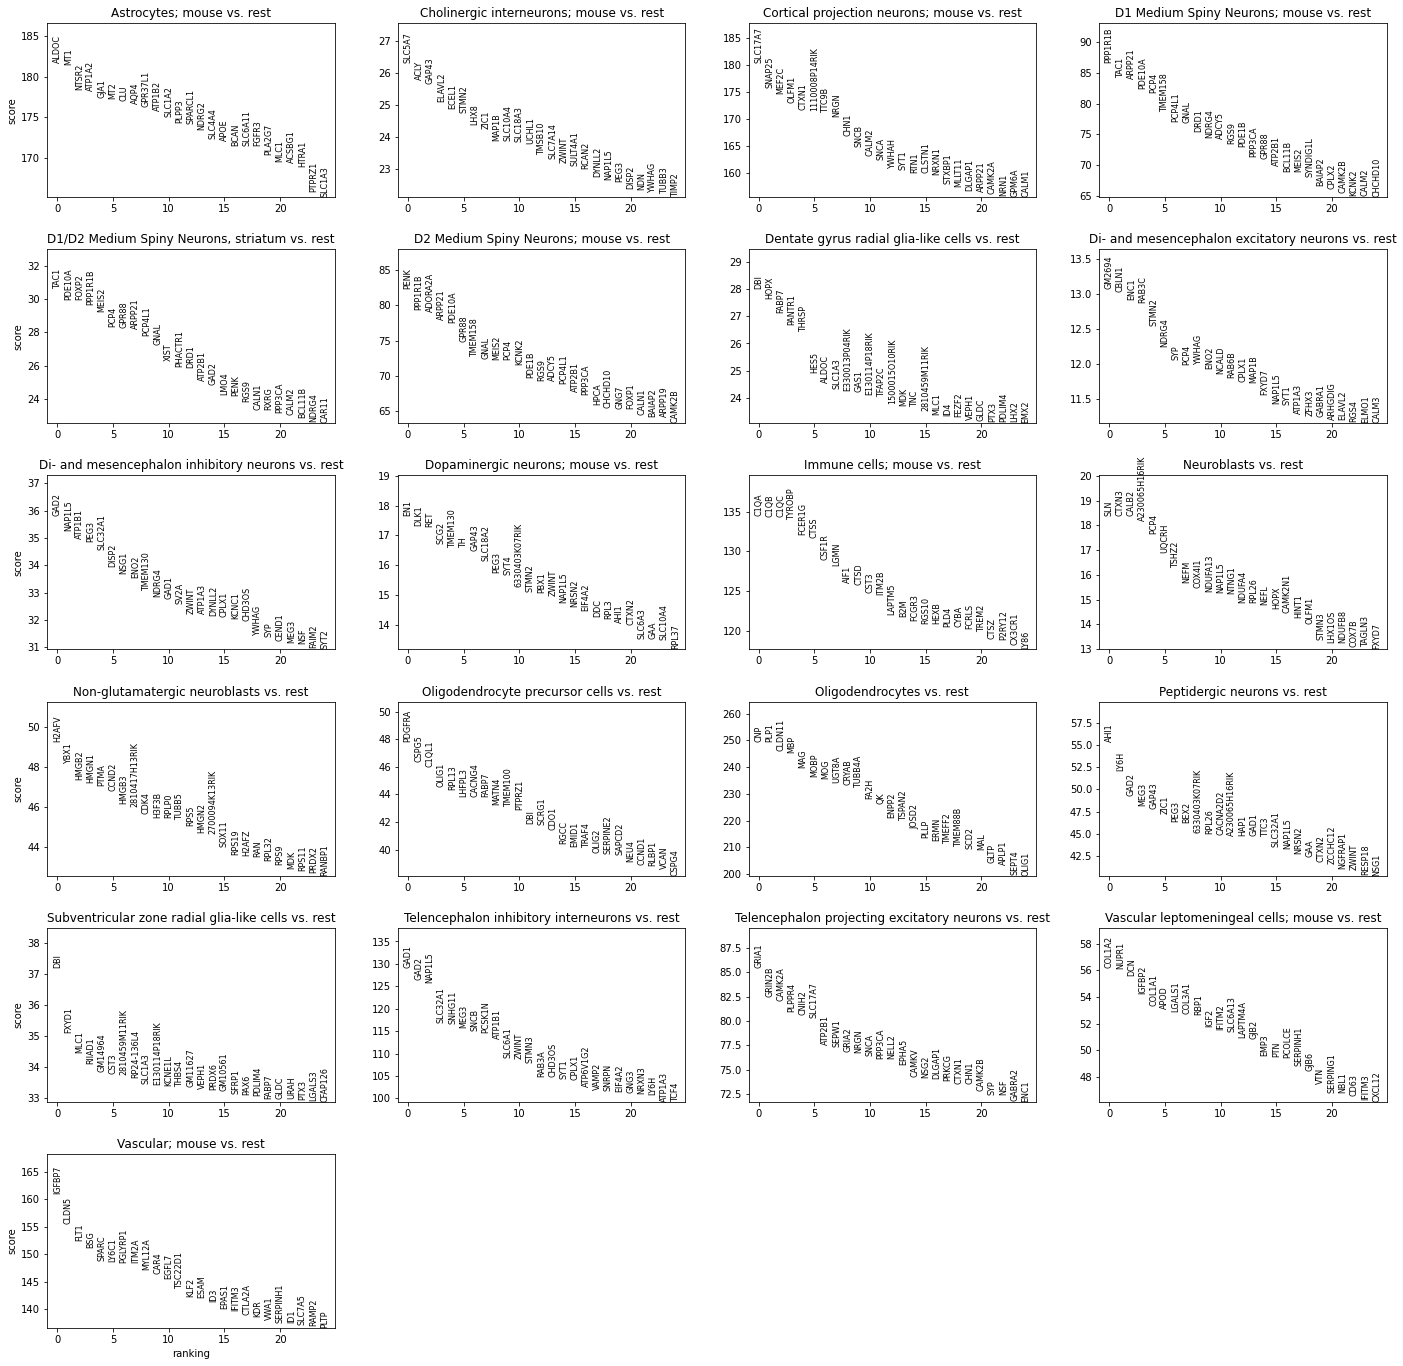

In [97]:
sc.tl.rank_genes_groups(adata_hvg, [ct_cols[0]], method='wilcoxon')
sc.pl.rank_genes_groups(adata_hvg, n_genes=25, sharey=False, save='deg_genes_wilcox')

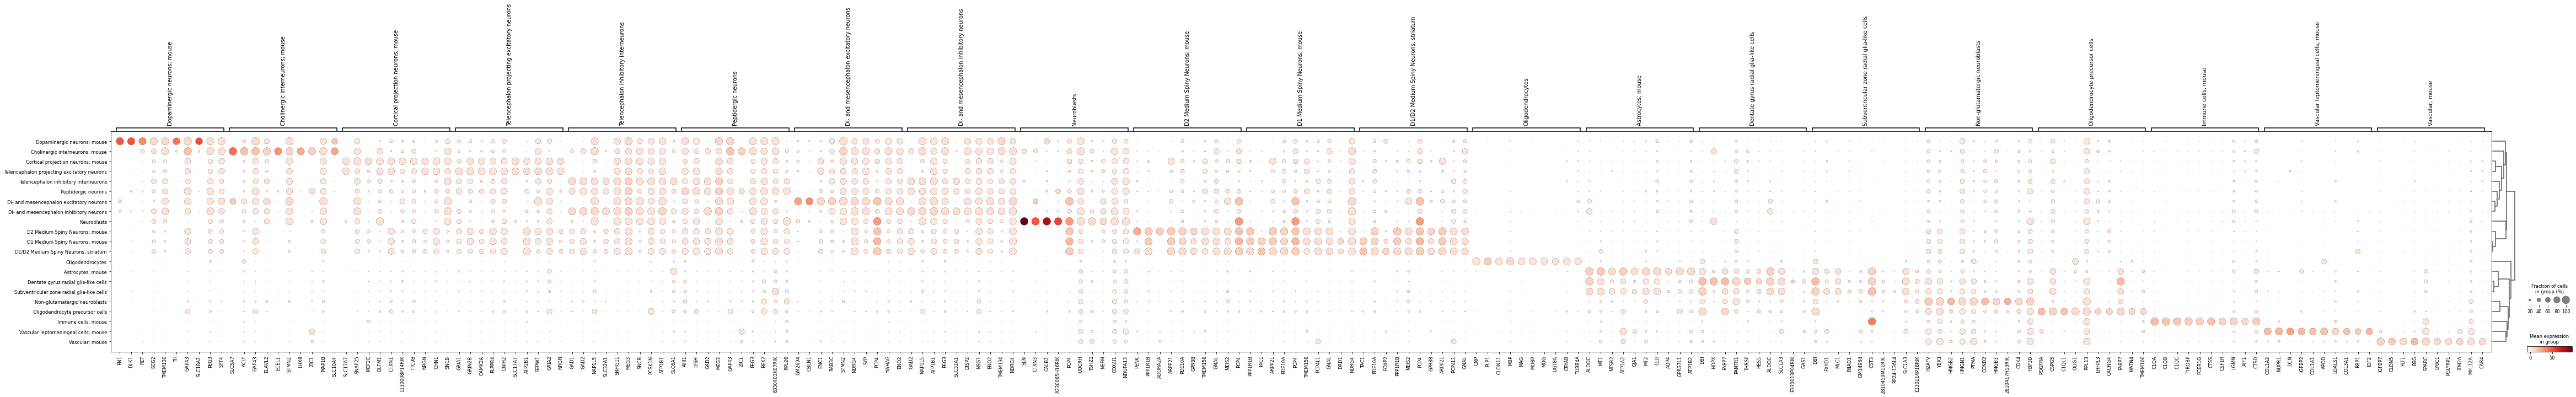

In [98]:
sc.pl.rank_genes_groups_dotplot(adata_hvg, n_genes=10)